## Data Analysis Python Proect

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px

In [2]:
df = pd.read_csv('Data/Netflix Userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
#Check duplicates
df.duplicated().sum()

np.int64(0)

In [4]:
#Check Null
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

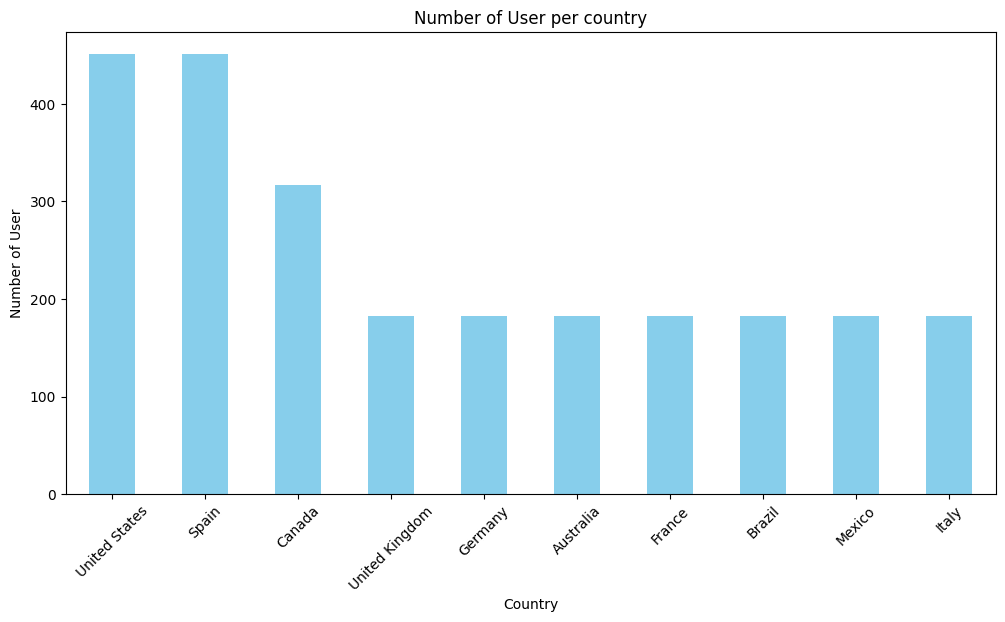

In [5]:
#Number of user per country
plt.figure(figsize=(12,6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of User per country')
plt.xlabel('Country')
plt.ylabel('Number of User')
plt.xticks(rotation=45)
plt.show()

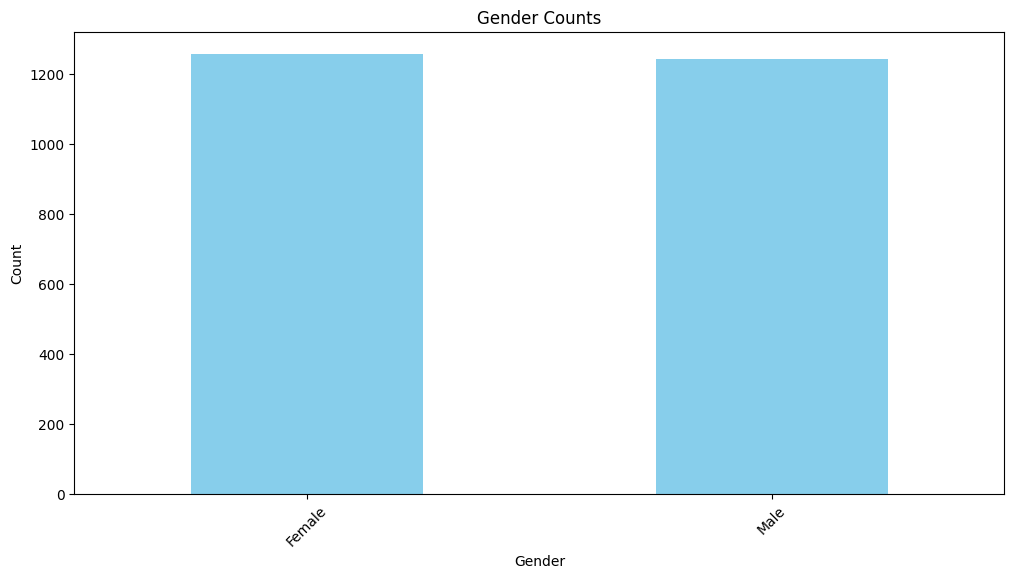

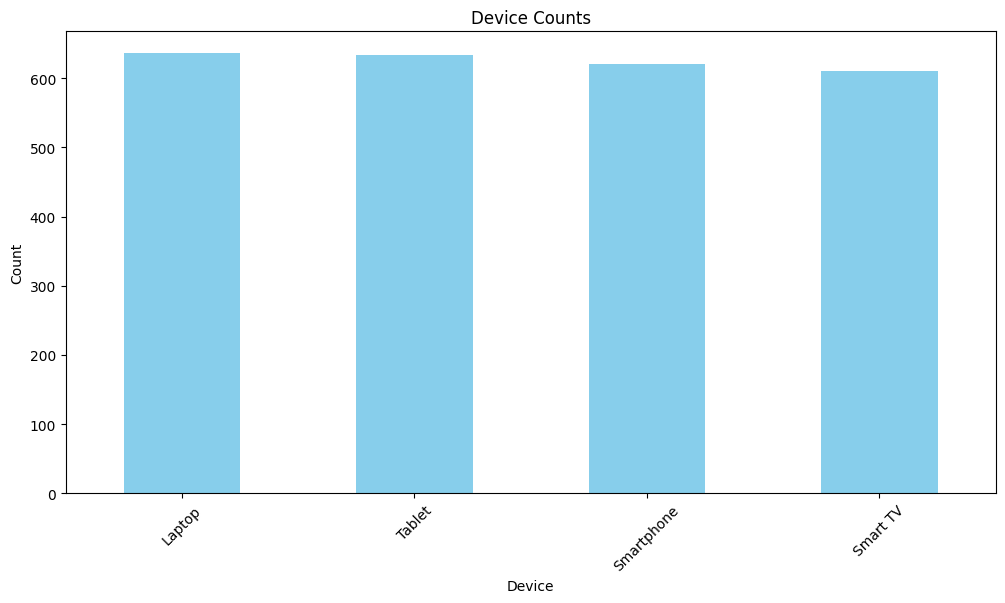

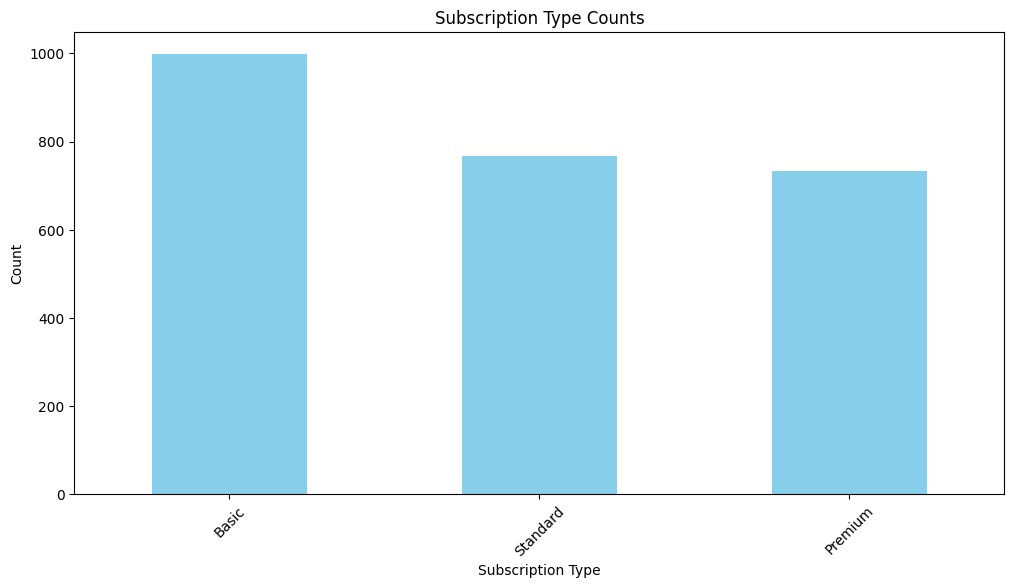

In [6]:
#Multiple Bar Chart
column_titles = {
    'Gender' : 'Gender Counts',
    'Device' : 'Device Counts',
    'Subscription Type' : 'Subscription Type Counts'
}

for column, title in column_titles.items():
    plt.figure(figsize=(12,6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
#Visual with a map
User_Counts_by_Country = df['Country'].value_counts().reset_index()
User_Counts_by_Country.columns = ['Country', 'User Count']

fig = px.choropleth(User_Counts_by_Country, locations='Country', locationmode='country names', color='User Count',
                    hover_name='Country', title='User Distribution by Country',
                    color_continuous_scale=px.colors.sequential.Plasma
                    )

fig.update_layout(
    width = 1000,
    height = 750,
    title_font_size = 24,
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

#fig.show(renderer='browser')  # Opens the plot in your default web browser
fig.show()

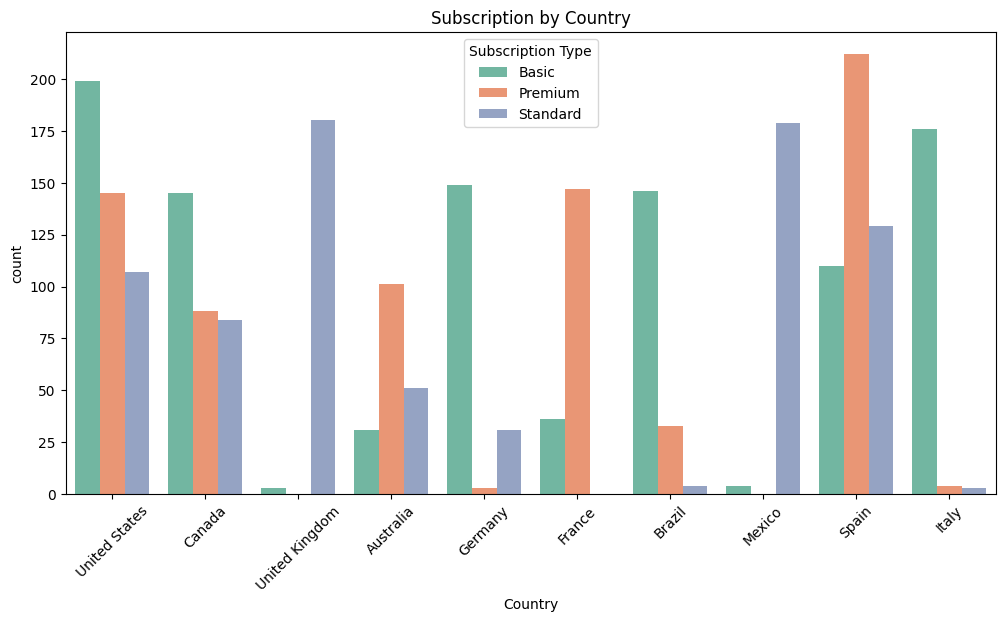

In [9]:
#Subscription by country
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Subscription Type', data=df, palette='Set2')
plt.title('Subscription by Country')
plt.xticks(rotation=45)
plt.show()


In [11]:
#Pivot Table
subs_by_country = df.pivot_table(index='Country', columns='Subscription Type', values='User ID', aggfunc='count', fill_value=0)
subs_by_country['Total'] = subs_by_country.sum(axis=1)
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


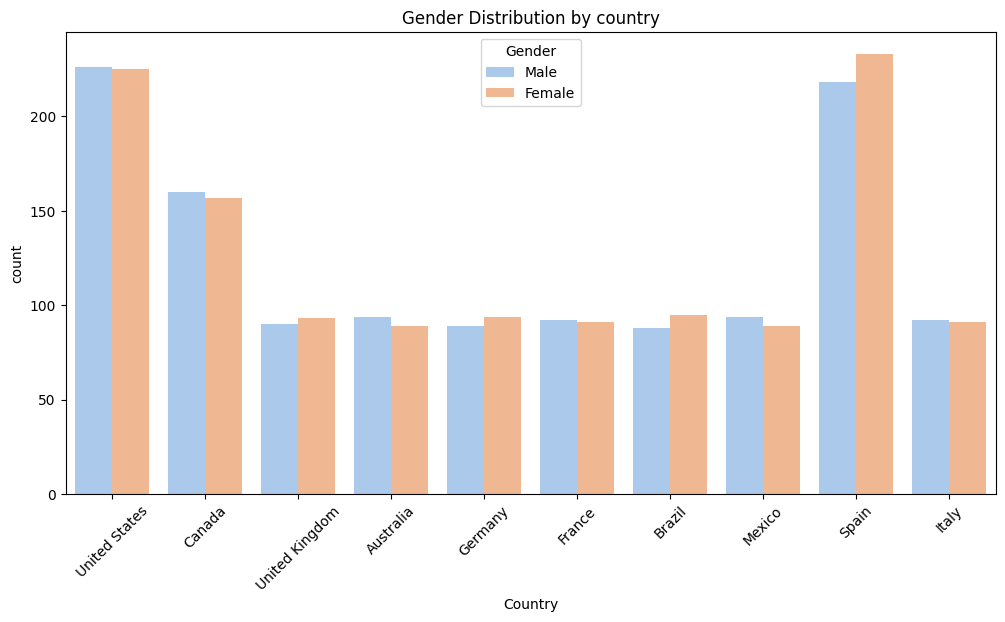

In [12]:
#Gender Distribution by country
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title('Gender Distribution by country')
plt.xticks(rotation=45)
plt.show()


In [13]:
#Pivot Table
gender_by_country = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
gender_by_country['Total'] = subs_by_country.sum(axis=1)
gender_by_country

Gender,Female,Male,Total
Country,,,
Australia,89,94,366
Brazil,95,88,366
Canada,157,160,634
France,91,92,366
Germany,94,89,366
Italy,91,92,366
Mexico,89,94,366
Spain,233,218,902
United Kingdom,93,90,366


In [14]:
#Total Pivot Table
subs_gender_by_country = df.pivot_table(index='Country', columns=['Gender', 'Subscription Type'], values='User ID', aggfunc='count', fill_value=0)
subs_gender_by_country['Total'] = subs_by_country.sum(axis=1)
subs_gender_by_country

Gender            Female                   Male                  Total
Subscription Type  Basic Premium Standard Basic Premium Standard      
Country                                                               
Australia             16      45       28    15      56       23   366
Brazil                78      16        1    68      17        3   366
Canada                68      40       49    77      48       35   634
France                17      74        0    19      73        0   366
Germany               80       1       13    69       2       18   366
Italy                 86       3        2    90       1        1   366
Mexico                 2       0       87     2       0       92   366
Spain                 60     113       60    50      99       69   902
United Kingdom         2       0       91     1       0       89   366
United States        103      72       50    96      73       57   902

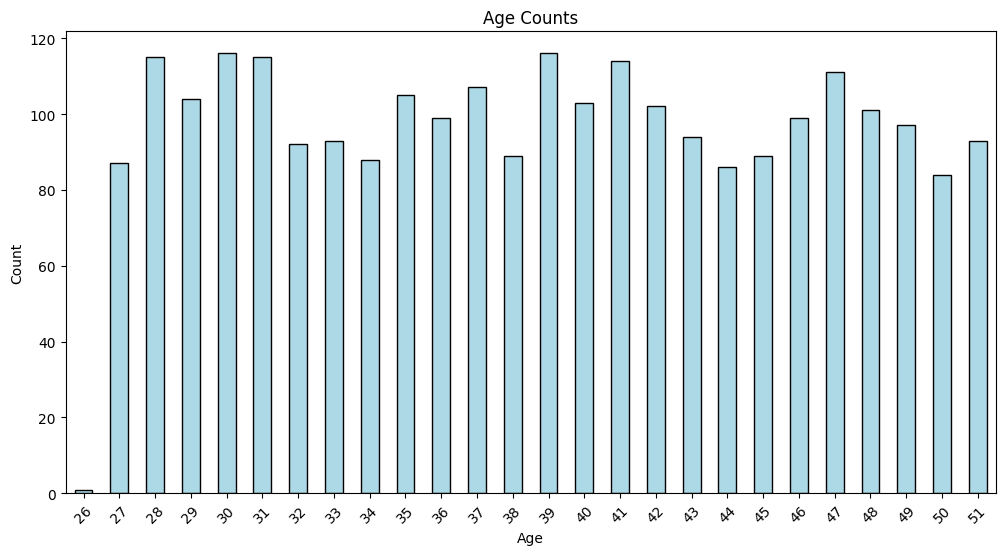

In [17]:
#Plot by Age
plt.figure(figsize=(12,6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Calculate the revenue

df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')
df['Duration']=(df['Last Payment Date'] - df['Join Date']).dt.days
df['Duration Months'] = df['Duration'].apply(lambda x: math.ceil(x / 30))

In [24]:
average_duration = df['Duration Months'].mean()

In [25]:
print(f"Average Duration: {average_duration}")

Average Duration: 10.7808


In [26]:
#Life time value
df['LTV'] = df['Monthly Revenue']*df['Duration Months']

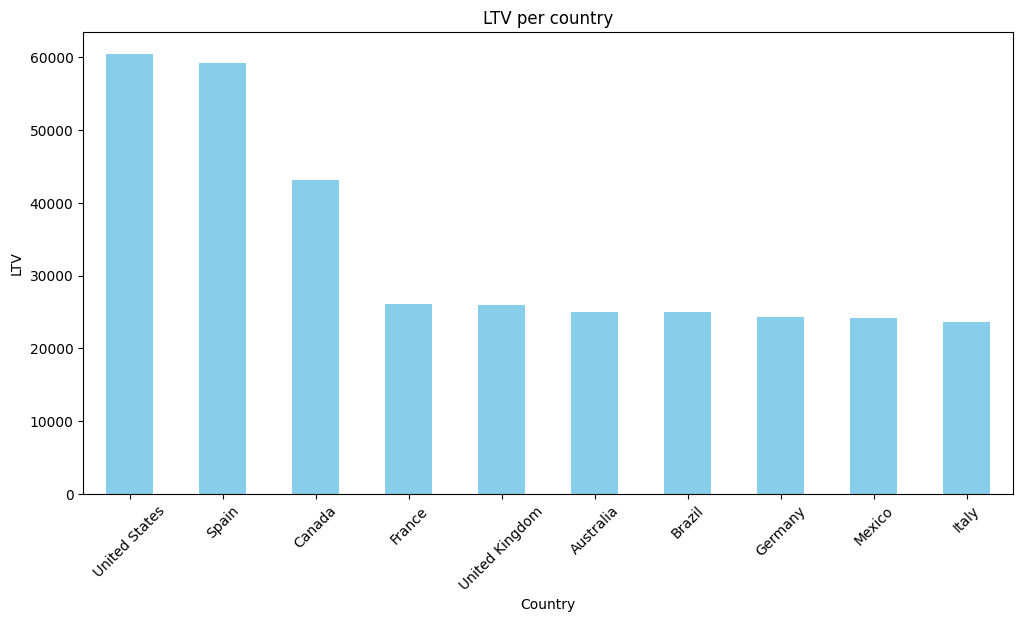

In [27]:
ltv_per_country_sum = df.groupby('Country')['LTV'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
ltv_per_country_sum.plot(kind='bar', color='skyblue')
plt.title('LTV per country')
plt.xlabel('Country')
plt.ylabel('LTV')
plt.xticks(rotation=45)
plt.show()